# Mall Customers Segmentation

## Import Libraries

In [1]:
# General Use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3D Visualization 
import plotly as py
import plotly.graph_objs as go

## Exploratory Data Analysis

In [2]:
# Read the data
df = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
# Check for missing values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Dropping the Gender Column and keeping only numeric columns
df.drop(columns=['Gender'], inplace=True) 

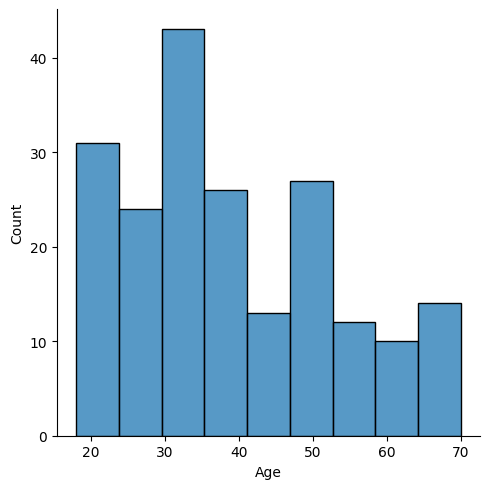

In [5]:
# Exploratory Data Analysis
sns.displot(df["Age"])

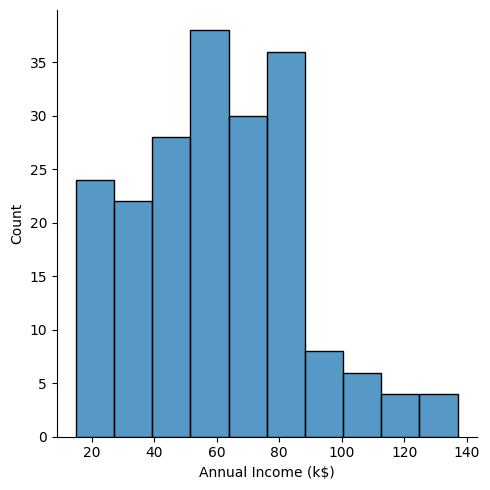

In [6]:
# Distribution of Annual Income
sns.displot(df["Annual Income (k$)"])

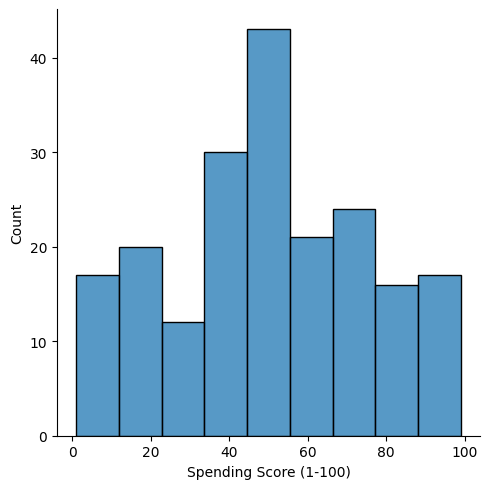

In [7]:
# Distribution of Spending Score
sns.displot(df["Spending Score (1-100)"]) 

## Client Segmentation with Annual Income and Spending Score

In [8]:
# Scatterplot of Annual Income and Spending Score
df1 = df[["Annual Income (k$)", "Spending Score (1-100)"]]

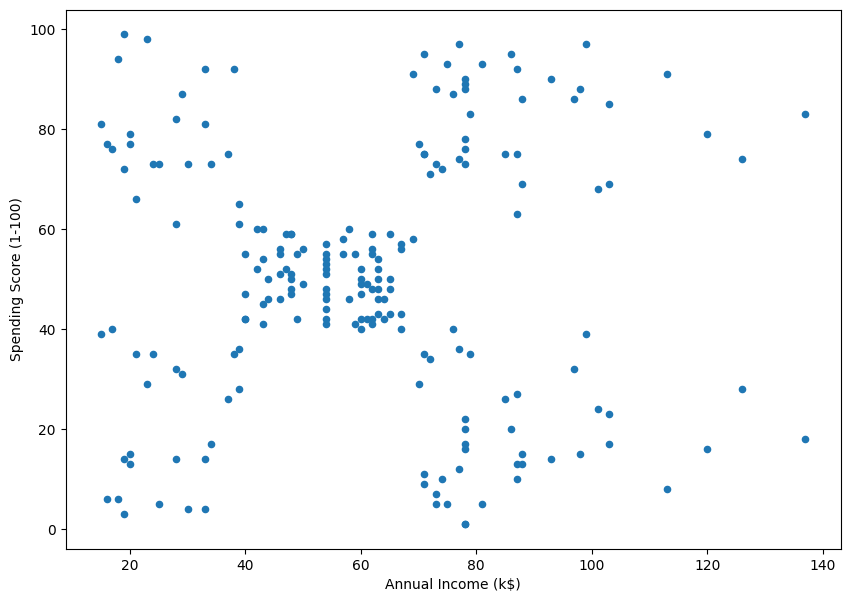

In [9]:
# Scatterplot
df1.plot(kind="scatter",
        x="Annual Income (k$)",
        y="Spending Score (1-100)",
        figsize=(10, 7))
plt.show()

## Finding the Optimal Number of Clusters with the Elbow Method

In [10]:
# Using the elbow method to find the optimal number of clusters
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df1)
    sum_of_sqr_dist[k] = km.inertia_

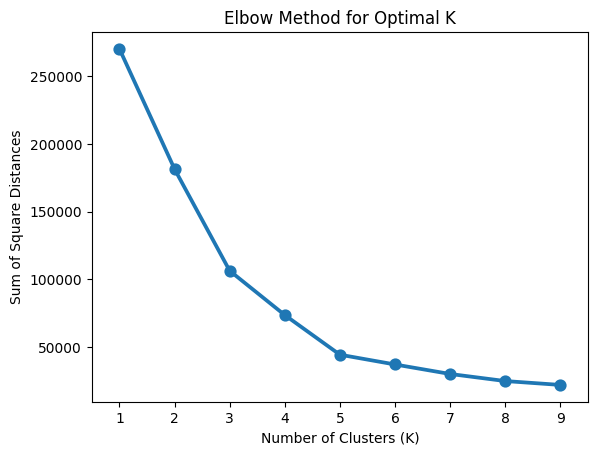

In [11]:
# Plotting the "Elbow"
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

## K-Means Clustering

In [12]:
# K-Means Clustering
Model = KMeans(n_clusters=5,
             init='k-means++',
             max_iter=1000)
Model.fit(df1)

KMeans(max_iter=1000, n_clusters=5)

In [13]:
# Labels Visualization
print("Labels", Model.labels_)

Labels [3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 4 3 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 0 1 4 1 0 1 0 1 4 1 0 1 0 1 0 1 0 1 4 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [14]:
# Centroid Visualization
print("Centroids", Model.cluster_centers_)

Centroids [[88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


In [15]:
# Visualizing Clusters
centroids = Model.cluster_centers_

In [16]:
# Client Segmentation with Annual Income and Spending Score
df1_cluster = df1.copy()
df1_cluster["Cluster"] = Model.fit_predict(df1)

In [17]:
# Adding Color Column
df1_cluster.head()

,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,
1,15,39,4
2,15,81,0
3,16,6,4
4,16,77,0
5,17,40,4


## Visualizing Clusters

In [18]:
# Plotting the Clusters
Color = ['red', 'blue', 'black', 'gold', 'navy']
df1_cluster['Color'] = df1_cluster['Cluster'].map(lambda p:Color[p])

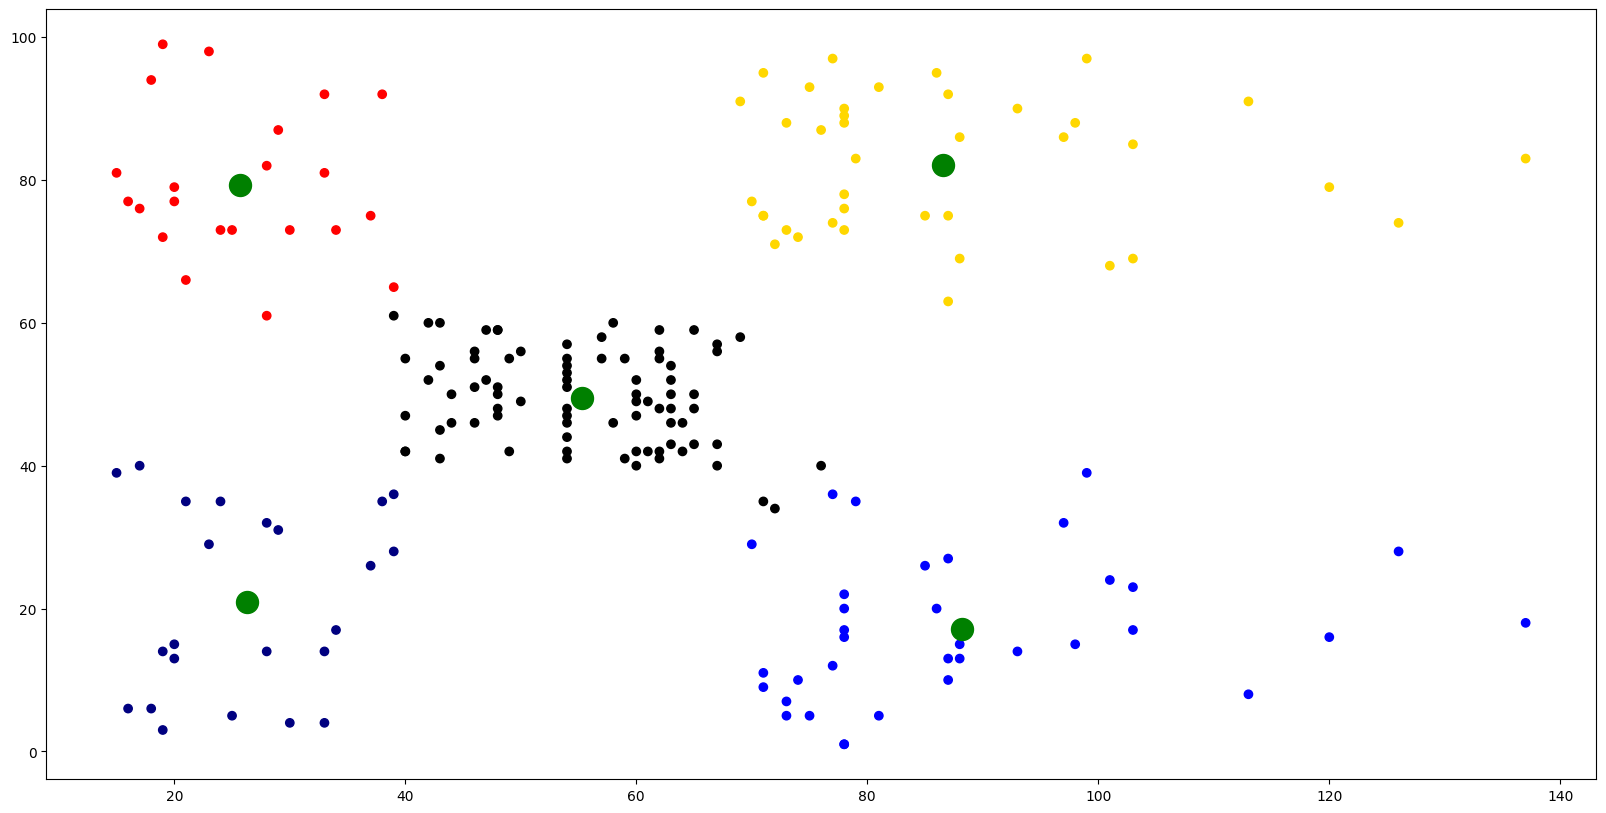

In [19]:
plt.figure(figsize=(20, 10))
plt.scatter(df1["Annual Income (k$)"],
           df1["Spending Score (1-100)"],
           c=df1_cluster["Color"])

plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=250)
plt.show()

## Evaluation with Silhouette Score

In [20]:
# Client Segmentation with Annual Income and Spending Score
labels = Model.labels_

In [21]:
# Silhouette Score
silhouette_score(df1, labels)

0.553931997444648

In [22]:
silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df1)
    silhouette[k] = silhouette_score(df1, km.labels_)

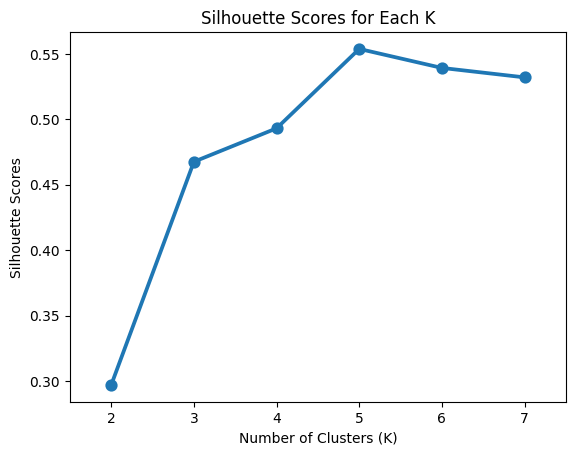

In [23]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

## Client Segmentation with All 3 Features

In [24]:
df2= df.copy()

In [25]:
# K-Means Clustering
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df2)
    sum_of_sqr_dist[k] = km.inertia_

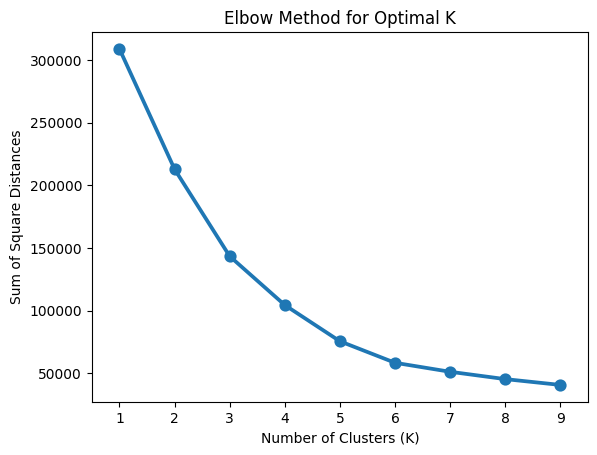

In [26]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [27]:
Model2 = KMeans(n_clusters=6, init='k-means++', max_iter=1000)
Model2.fit(df2)

KMeans(max_iter=1000, n_clusters=6)

In [28]:
# Adding Cluster Column
df2['Cluster'] = Model2.fit_predict(df2)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
1,19,15,39,0
2,21,15,81,5
3,20,16,6,0
4,23,16,77,5
5,31,17,40,0


In [29]:
# Client Segmentation with All 3 Features
labels = Model2.labels_
centroids = Model2.cluster_centers_

In [30]:
# Visualizing Clusters 
df2['labels'] = labels

trace = go.Scatter3d(
                    x = df2['Age'],
                    y = df2['Annual Income (k$)'],
                    z = df2['Spending Score (1-100)'],
                    mode = 'markers',
                    marker=dict(color=df2['labels'], size = 5, line=dict(color=df2['labels'], width=12), opacity=0.8)
                    )
    
data = [trace]
layout = go.Layout(
                    title='Clusters',
                    scene= dict(
                                xaxis = dict(title = 'Age'),
                                yaxis = dict(title = 'Annual Income (k$)'),
                                zaxis = dict(title = 'Spending Score (1-100)'))
                                )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c291c622-1aca-459c-9283-997fd4a58680' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>